<a href="https://colab.research.google.com/github/darayn/ResNet_50_Car_CLassifier/blob/master/Car_Classifier_Resnet50_Transfer_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
!unzip gdrive/"My Drive"/Datasets.zip

Archive:  gdrive/My Drive/Datasets.zip
   creating: Datasets/Test/
   creating: Datasets/Test/audi/
  inflating: Datasets/Test/audi/21.jpg  
  inflating: Datasets/Test/audi/22.jpg  
  inflating: Datasets/Test/audi/23.jpg  
  inflating: Datasets/Test/audi/24.jpg  
  inflating: Datasets/Test/audi/25.jpg  
  inflating: Datasets/Test/audi/26.jpg  
  inflating: Datasets/Test/audi/27.jpg  
 extracting: Datasets/Test/audi/28.jpg  
  inflating: Datasets/Test/audi/29.jpg  
   creating: Datasets/Test/lamborghini/
  inflating: Datasets/Test/lamborghini/1.jpg  
  inflating: Datasets/Test/lamborghini/10.jpg  
  inflating: Datasets/Test/lamborghini/11.jpg  
  inflating: Datasets/Test/lamborghini/12.jpg  
  inflating: Datasets/Test/lamborghini/13.jpg  
  inflating: Datasets/Test/lamborghini/14.jpg  
  inflating: Datasets/Test/lamborghini/15.jpg  
  inflating: Datasets/Test/lamborghini/16.jpg  
  inflating: Datasets/Test/lamborghini/17.jpg  
  inflating: Datasets/Test/lamborghini/18.jpg  
  inflating:

In [ ]:
from tensorflow.keras.layers import Input ,Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50,preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [ ]:
IMAGE_SIZE = [224,224]

train_path = '/content/Datasets/Train'
valid_path = '/content/Datasets/Test'

In [ ]:
resnet = ResNet50(input_shape=IMAGE_SIZE +[3],weights="imagenet",include_top=False)

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layers in resnet.layers:
    layers.trainable = False

In [ ]:
folders = glob('Datasets/Train/*')

In [ ]:
X = Flatten()(resnet.output)


In [ ]:
prediction = Dense(len(folders),activation='softmax')(X)

model = Model(inputs = resnet.input, outputs = prediction )

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer = 'adam',
    metrics = ['accuracy']
)

In [ ]:
train_datafen =ImageDataGenerator(rescale= 1./255,shear_range = 0.2,
                                 zoom_range=0.2,
                                 horizontal_flip=True)

test_datafen =ImageDataGenerator(rescale= 1./255)



In [ ]:
training_set = train_datafen.flow_from_directory('/content/Datasets/Train',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 64 images belonging to 3 classes.


In [ ]:
testing_set = test_datafen.flow_from_directory('/content/Datasets/Test',
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical')

Found 58 images belonging to 3 classes.


In [ ]:
r = model.fit_generator(
training_set,
validation_data=testing_set,
epochs = 50,
steps_per_epoch=len(training_set),
validation_steps=len(testing_set))

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/50
2/2 [==============================] - 2s 931ms/step - loss: 9.0797 - accuracy: 0.2031 - val_loss: 4.9006 - val_accuracy: 0.5172
Epoch 2/50
2/2 [==============================] - 1s 350ms/step - loss: 4.5113 - accuracy: 0.3281 - val_loss: 10.8842 - val_accuracy: 0.1552
Epoch 3/50
2/2 [==============================] - 1s 359ms/step - loss: 6.5325 - accuracy: 0.4062 - val_loss: 11.7298 - val_accuracy: 0.3276
Epoch 4/50
2/2 [==============================] - 1s 345ms/step - loss: 7.2714 - accuracy: 0.3906 - val_loss: 7.5119 - val_accuracy: 0.3448
Epoch 5/50
2/2 [==============================] - 1s 354ms/step - loss: 4.1235 - accuracy: 0.5312 - val_loss: 2.8960 - val_accuracy: 0.1552
Epoch 6/50
2/2 [==============================] - 1s 351ms/step - loss: 2.3160 - accuracy: 0.3750 - val_loss: 3.1434 - val_accuracy: 0.5172
Epoch 7/50
2/2 [==============================] - 1s 352ms/step - loss: 3.7799 - a

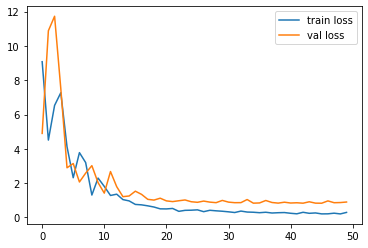

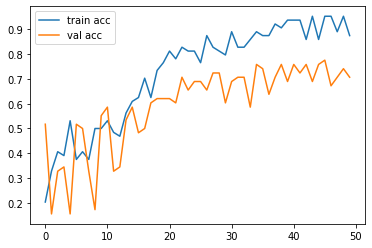

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')


In [ ]:
from tensorflow.keras.models import load_model

model.save("transfer_l_resnet.h5")

In [ ]:
y_pred = model.predict(testing_set)

In [ ]:
y_pred

array([[2.72924230e-02, 7.10268319e-01, 2.62439251e-01],
       [9.70132928e-03, 8.76747251e-01, 1.13551468e-01],
       [5.37673533e-01, 1.41499177e-01, 3.20827365e-01],
       [4.60688844e-02, 9.12349299e-03, 9.44807649e-01],
       [9.65664625e-01, 1.47668282e-02, 1.95685215e-02],
       [5.41934222e-02, 2.79884458e-01, 6.65922105e-01],
       [2.89285690e-01, 6.38501287e-01, 7.22130463e-02],
       [2.68106032e-02, 1.71443686e-01, 8.01745772e-01],
       [3.95931257e-03, 1.81938764e-02, 9.77846861e-01],
       [1.79039631e-02, 7.80003071e-01, 2.02092886e-01],
       [1.73326163e-03, 5.22669256e-01, 4.75597560e-01],
       [2.07072925e-02, 3.25196594e-01, 6.54096127e-01],
       [3.21093462e-02, 3.93306136e-01, 5.74584484e-01],
       [5.60780525e-01, 1.05747823e-02, 4.28644687e-01],
       [2.41996553e-02, 1.54813856e-01, 8.20986509e-01],
       [7.18209594e-02, 5.91890980e-03, 9.22260165e-01],
       [1.09924786e-01, 8.42846453e-01, 4.72287536e-02],
       [4.07590233e-02, 6.16643

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 1, 0, 2, 0, 2, 1, 2, 2, 1, 1, 2, 2, 0, 2, 2, 1, 2, 0, 2, 1, 2,
       1, 0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2, 2,
       2, 2, 2, 1, 2, 1, 2, 1, 0, 2, 2, 0, 1, 2])

In [ ]:
model = load_model("/content/transfer_l_resnet.h5")

In [ ]:
img = image.load_img('/content/Datasets/Test/lamborghini/11.jpg',target_size=(224,224))

In [ ]:
x = image.img_to_array(img)
x

array([[[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [196., 187., 172.],
        [217., 208., 193.],
        [243., 234., 219.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [245., 245., 237.],
        [243., 243., 235.],
        [242., 242., 234.]],

       [[252., 252., 252.],
        [252., 252., 252.],
        [252., 252., 252.],
        ...,
        [240., 249., 248.],
        [242., 251., 250.],
        [242., 251., 250.]],

       ...,

       [[189., 207., 229.],
        [190., 206., 229.],
        [190., 206., 229.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 206., 227.],
        ...,
        [171., 180., 187.],
        [171., 180., 187.],
        [171., 180., 187.]],

       [[185., 206., 227.],
        [185., 206., 227.],
        [185., 2

In [ ]:
x.shape

(224, 224, 3)

In [ ]:
x = x/225

In [ ]:
x

array([[[1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        ...,
        [0.8711111 , 0.83111113, 0.7644445 ],
        [0.96444446, 0.92444444, 0.8577778 ],
        [1.08      , 1.04      , 0.97333336]],

       [[1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        ...,
        [1.0888889 , 1.0888889 , 1.0533333 ],
        [1.08      , 1.08      , 1.0444444 ],
        [1.0755556 , 1.0755556 , 1.04      ]],

       [[1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        [1.12      , 1.12      , 1.12      ],
        ...,
        [1.0666667 , 1.1066667 , 1.1022222 ],
        [1.0755556 , 1.1155555 , 1.1111112 ],
        [1.0755556 , 1.1155555 , 1.1111112 ]],

       ...,

       [[0.84      , 0.92      , 1.0177778 ],
        [0.84444445, 0.91555554, 1.0177778 ],
        [0.84444445, 0

In [ ]:
x = np.expand_dims(x,axis=0)
img_data = preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [ ]:
model.predict(img_data)

array([[1.6861708e-03, 3.4708076e-04, 9.9796677e-01]], dtype=float32)

In [ ]:
a = np.argmax(model.predict(img_data),axis=1)

In [ ]:
a

array([2])

In [ ]:
a==0

array([False])